In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv
/kaggle/input/songss/dataset.csv


In [63]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')
dforig = pd.read_csv('/kaggle/input/spotify/dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Расшифровка столбцов

* track_id - айди песни (str)
* artists - артист (str)
* album_name - название альбома песни (str)
* track_name - название песни (str)
* **(TARGET)** popularity - оценка популярности в песни (от 0 до 100)
* duration_ms - продолжительность песни (в мс)
* explicit - наличие ненормативная лексика(true/false)
* danceability - танцевальность(0.0 - 1.0)
* energy - энергичность (0.0 - 1.0)
* key - тон песни (int)
* loudness - громкость песни (float с отрицательными значениями)
* mode - режим (0/1)
* specchiness - мера присутствия слов в песни (0.0-1.0)
* acousticness - акустичность песни (0.0 - 1.0)
* instrumentalness - присутствие инструментов в песни (0.0 - 1.0)
* liveness - присутствие в песни живого исполнения(0.0 - 1.0)
* valence - эмоциональность песни(0.0 - 1.0)
* tempo - удары в минуту (float)
* time_signature - числовое значение, которое указывает на количество долей в такте (int)
* track_genre - жанр песни (str)

# EDA

## 1) **Гипотеза:** популярность песни зависит от ее продолжительности



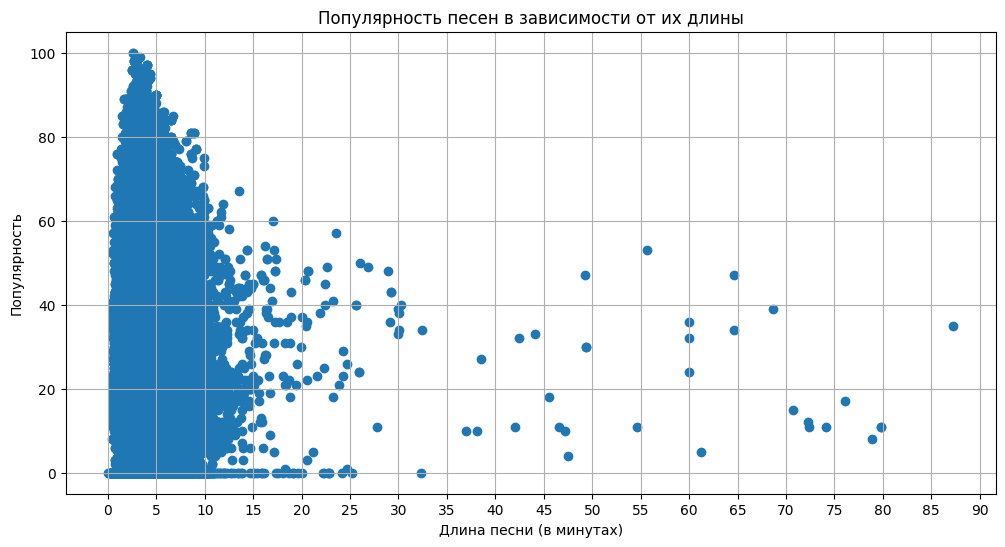

In [64]:
# duration_ms в минуты
df['duration_m'] = df['duration_ms'] / 60000

# Построю график
plt.figure(figsize=(12, 6))
plt.scatter(df['duration_m'], df['popularity'])
plt.xlabel('Длина песни (в минутах)')
plt.ylabel('Популярность')
plt.title('Популярность песен в зависимости от их длины')
plt.grid(True)
plt.xticks(np.arange(0, df['duration_m'].max() + 5, 5))
plt.show()

### **Вывод:** В основном популярны песни длиной от 0 до 12 минут.

Узнаю медианное значение популярности песни в зависимости от времени

In [65]:
# разобью значения времени по интервалам
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 30,40,50,60, df['duration_m'].max()]
labels = ['0-1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10-15 мин', '15-20 мин', '20-30 мин', '30-40 мин','40-50 мин','50-60 мин','60+ мин']
df['time_interval'] = pd.cut(df['duration_m'], bins=bins, labels=labels)

# выведу медианные значения
median_popularity = df.groupby('time_interval')['popularity'].median()

median_popularity

time_interval
0-1 мин      21.0
1-2 мин      27.0
2-3 мин      33.0
3-4 мин      37.0
4-5 мин      37.0
5-10 мин     31.0
10-15 мин    22.0
15-20 мин    24.5
20-30 мин    33.0
30-40 мин    30.5
40-50 мин    24.0
50-60 мин    32.0
60+ мин      16.0
Name: popularity, dtype: float64

### **Вывод:** Действительно наибольшую популярность имеют песни с небольшой продолжительностью. Стоит отметить одинаковую наибольшую популярность у треков с интервалом в 3-5 минут

## 2) **Гипотеза:** наличие ненормативной лексики влияет на ее популярность

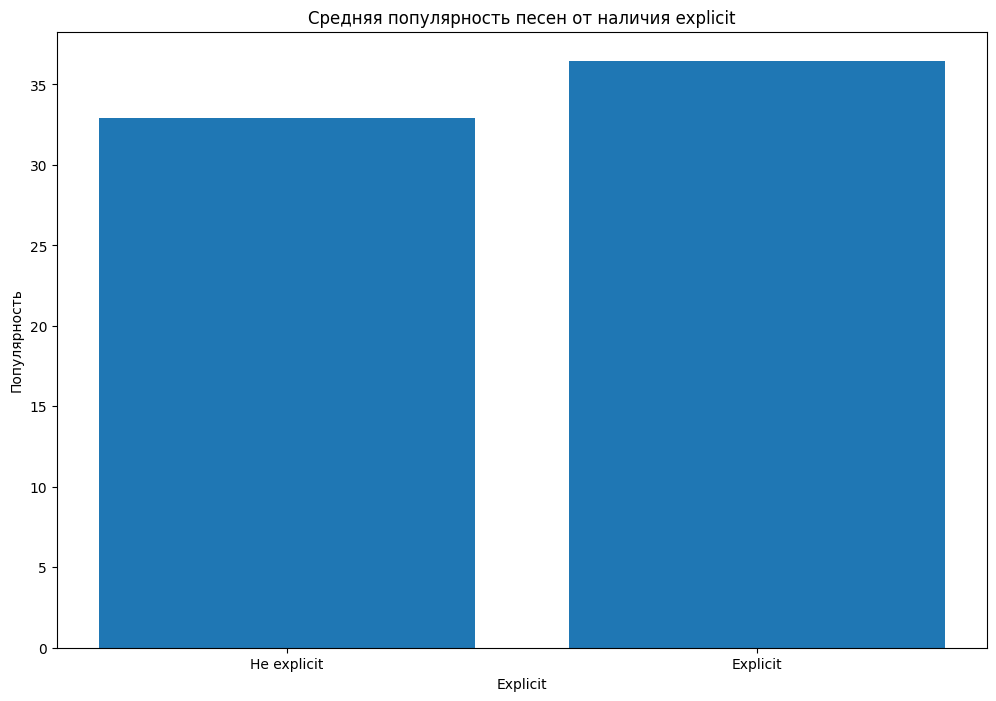

In [66]:
# Группировка данных по столбцу 'explicit' и вычисление среднего значения столбца 'popularity' 
explicit_popularity = df.groupby('explicit')['popularity'].mean()

# Построю график
plt.figure(figsize=(12, 8))
plt.bar(explicit_popularity.index, explicit_popularity.values)
plt.xlabel('Explicit')
plt.ylabel('Популярность')
plt.title('Средняя популярность песен от наличия explicit')
plt.xticks([0, 1], ['Не explicit', 'Explicit'])
plt.show()

## **Вывод:** в среднем более популярны песни с ненормативной лексикой

## 3) **Гипотеза:** Популярность трека зависит от жанра

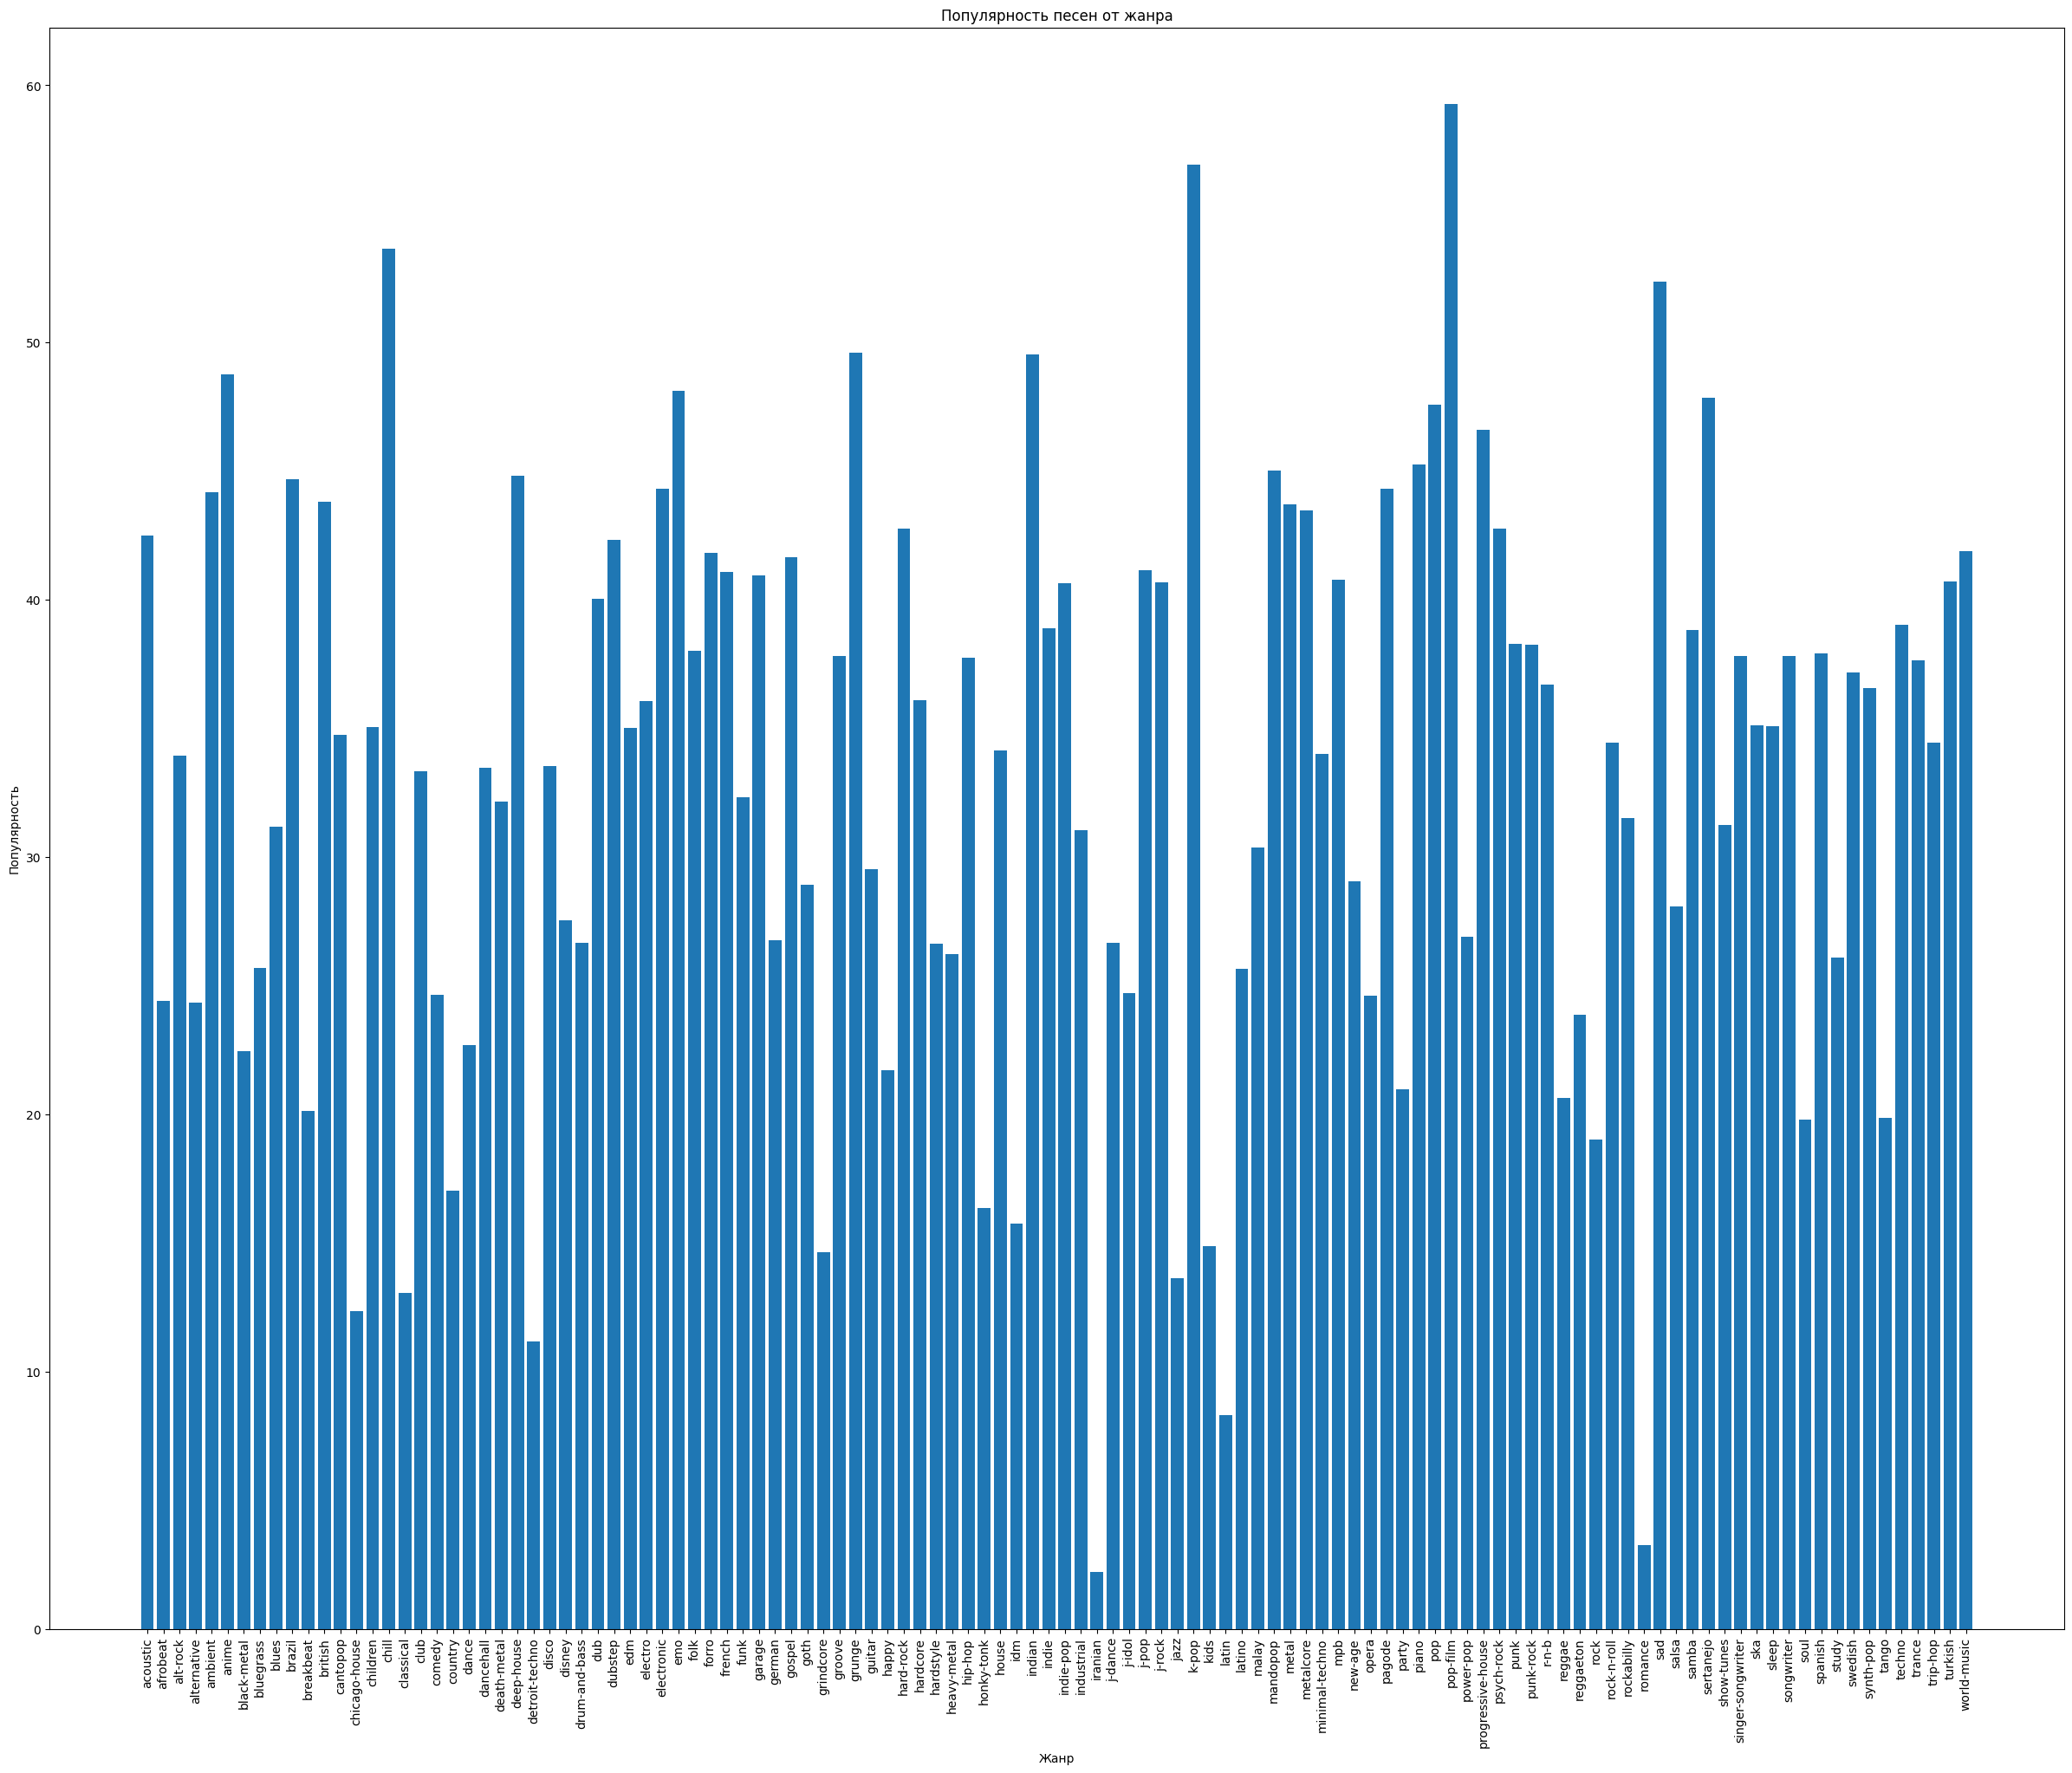

In [67]:
# Группировка данных по столбцу 'track_genre' и вычисление среднего значения столбца 'popularity' 
genre_popularity = df.groupby('track_genre')['popularity'].mean()

plt.figure(figsize=(30, 24))
plt.bar(genre_popularity.index, genre_popularity.values)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.title('Популярность песен от жанра')
plt.xticks(rotation=90)
plt.show()


Жанров слишком много. Построю график топ 10

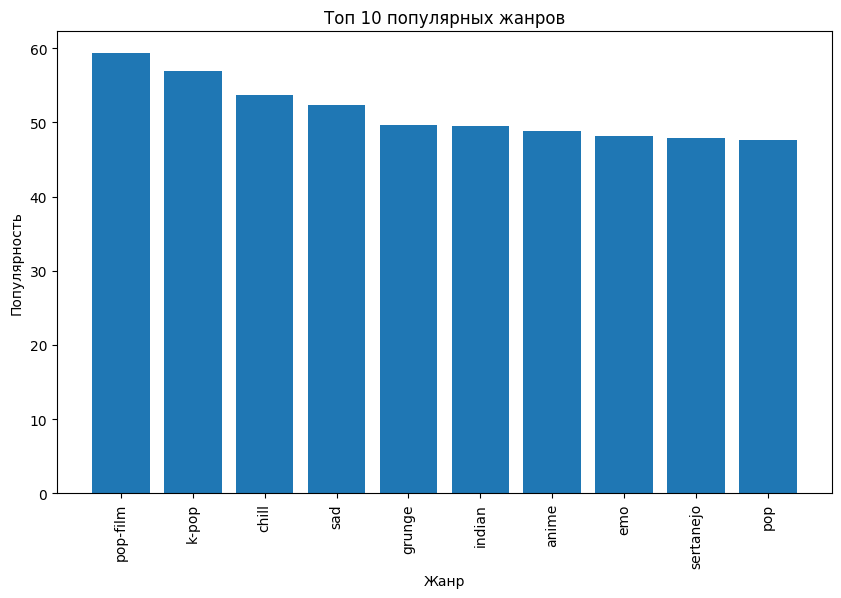

In [68]:
# выведу в переменную топ 10 песен по жанру
top_10 = genre_popularity.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.title('Топ 10 популярных жанров')
plt.xticks(rotation=90)
plt.show()

Дополнительно найду топ 10 самых не популярных жанров

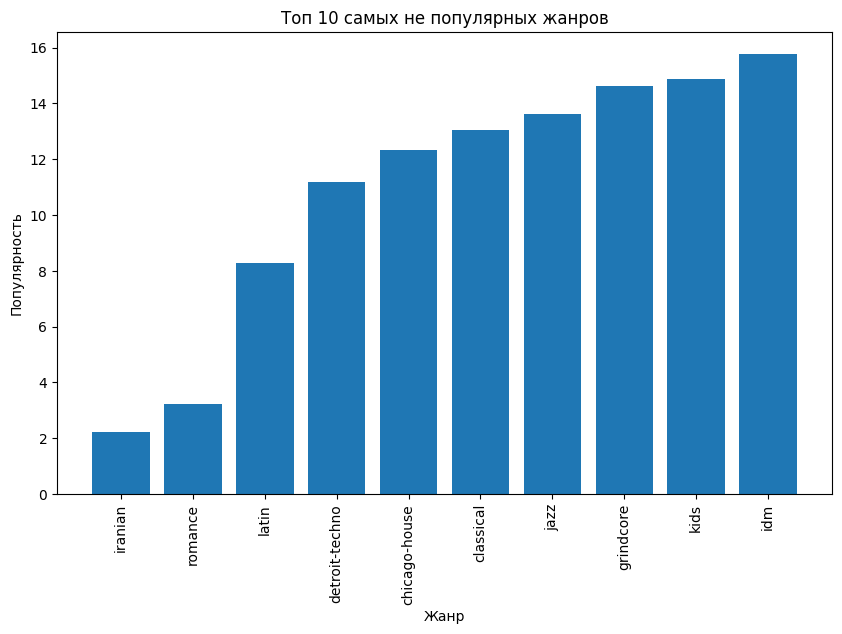

In [69]:
# выведу в переменную топ 10 самых не популярных жанров 
bot_10 = genre_popularity.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(bot_10.index, bot_10.values)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.title('Топ 10 самых не популярных жанров')
plt.xticks(rotation=90)
plt.show()

## Вывод: Жанр влияет на популярность треков.
* Топ 5 самых популярных жанров: pop-film, kpop, chill, sad, grunge
* Топ 5 самых непопулярных жанров: iranian, romance, latin, detroit-techno, chicago-house


## 4) **Гипотеза:** Параметры по типу danceability, energy, acousticness и т.д должны влиять на популярность

Выведу графики зависимости популярности от каждого из параметра

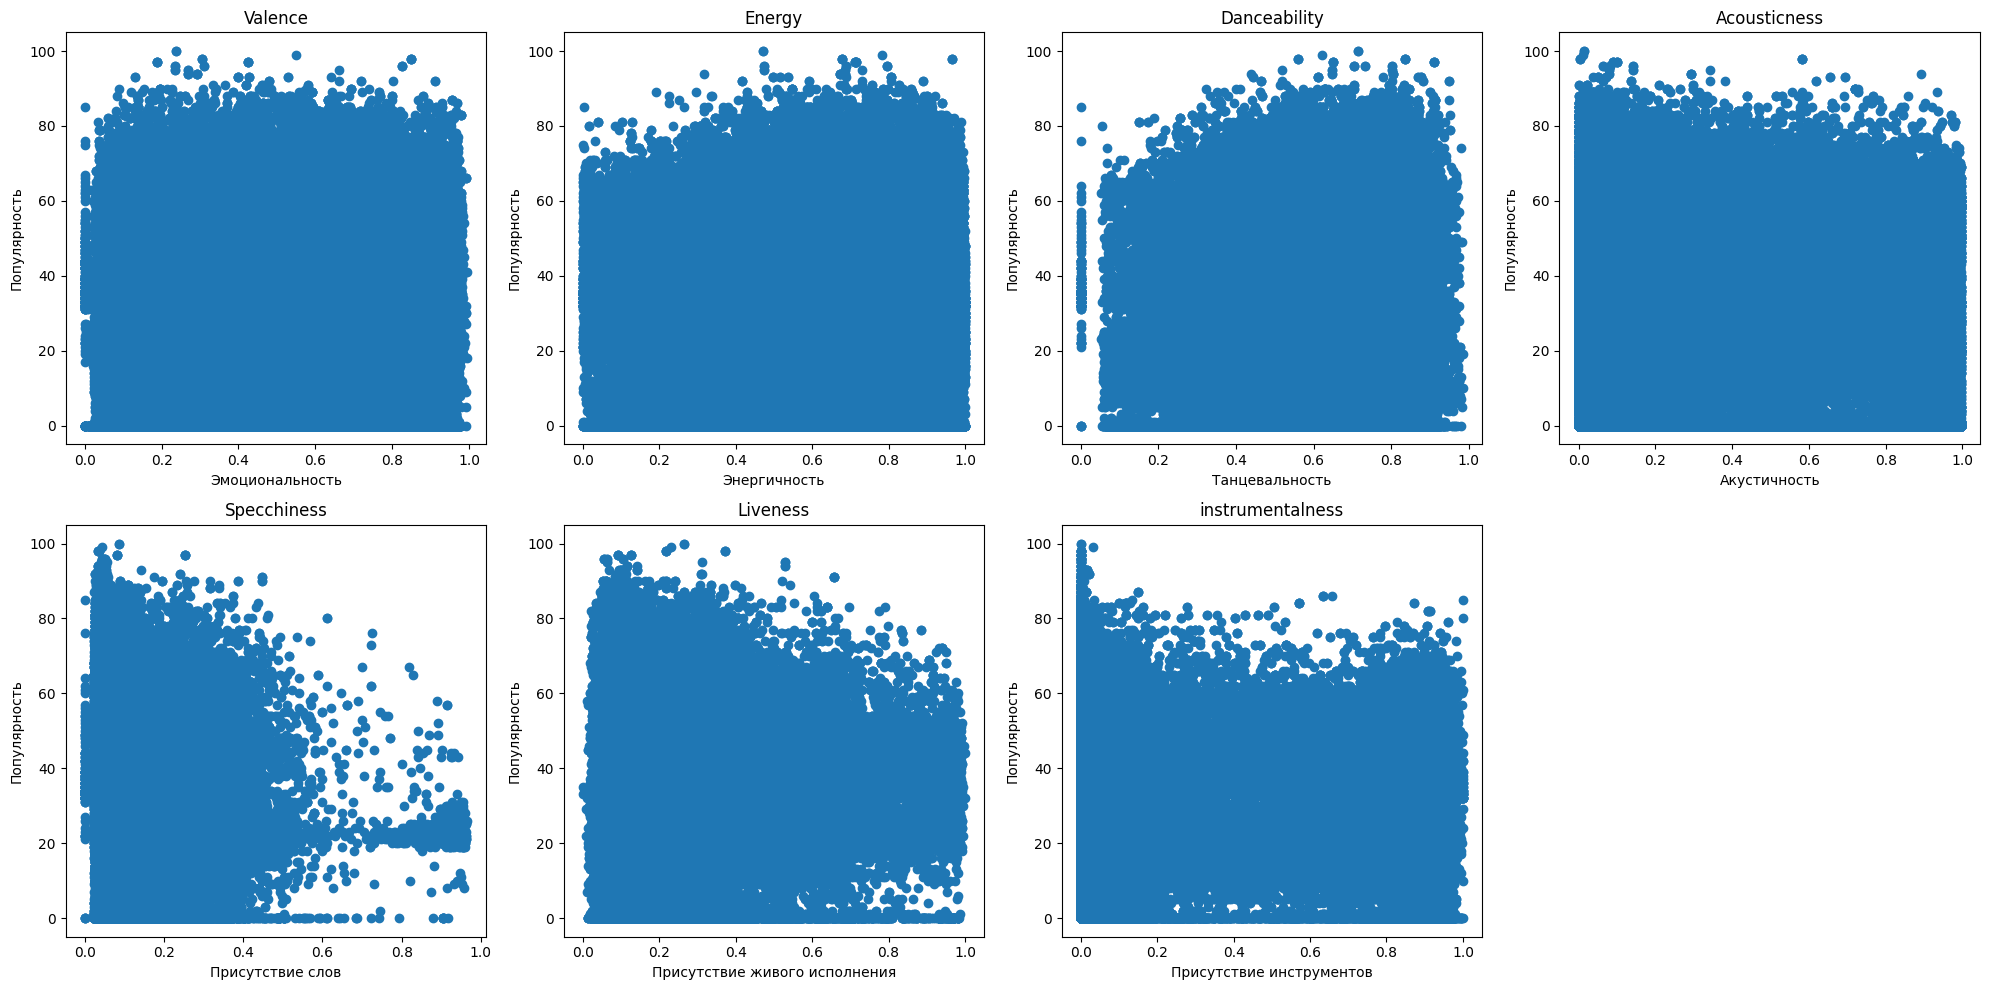

In [70]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0, 0].scatter(df['valence'], df['popularity'])
axs[0, 0].set_title('Valence')
axs[0, 0].set_xlabel('Эмоциональность')
axs[0, 0].set_ylabel('Популярность')

axs[0, 1].scatter(df['energy'], df['popularity'])
axs[0, 1].set_title('Energy')
axs[0, 1].set_xlabel('Энергичность')
axs[0, 1].set_ylabel('Популярность')

axs[0, 2].scatter(df['danceability'], df['popularity'])
axs[0, 2].set_title('Danceability')
axs[0, 2].set_xlabel('Танцевальность')
axs[0, 2].set_ylabel('Популярность')

axs[0, 3].scatter(df['acousticness'], df['popularity'])
axs[0, 3].set_title('Acousticness')
axs[0, 3].set_xlabel('Акустичность')
axs[0, 3].set_ylabel('Популярность')

axs[1, 0].scatter(df['speechiness'], df['popularity'])
axs[1, 0].set_title('Specchiness')
axs[1, 0].set_xlabel('Присутствие слов')
axs[1, 0].set_ylabel('Популярность')

axs[1, 1].scatter(df['liveness'], df['popularity'])
axs[1, 1].set_title('Liveness')
axs[1, 1].set_xlabel('Присутствие живого исполнения')
axs[1, 1].set_ylabel('Популярность')

axs[1, 2].scatter(df['instrumentalness'], df['popularity'])
axs[1, 2].set_title('instrumentalness')
axs[1, 2].set_xlabel('Присутствие инструментов')
axs[1, 2].set_ylabel('Популярность')

fig.delaxes(axs[1, 3])

plt.tight_layout()
plt.show()

## Вывод: Видно что из данных параметров, какое-либо влияние оказывает speechiness, при этом важно отметить что популярны песни с низкой мерой присутствия слов.

## 5) **Гипотеза:** Громкость влияет на популярность песни


Построю график зависимости популярности от громкости песни

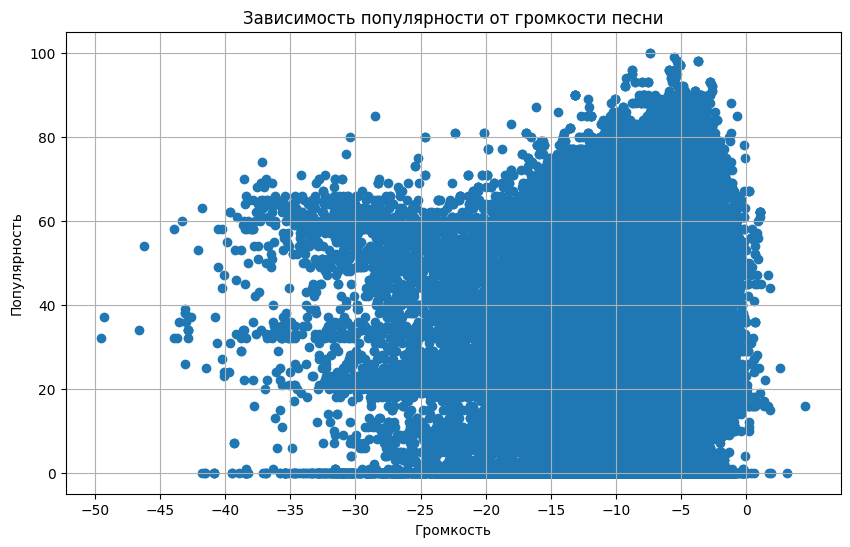

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['loudness'], df['popularity'])
plt.xlabel('Громкость')
plt.ylabel('Популярность')
plt.title('Зависимость популярности от громкости песни')
plt.xticks(np.arange(0, df['loudness'].min() - 5, -5))
plt.grid(True)
plt.show()

## Вывод: Громкость влияет на популярность. Самые популярные треки имеют громкость от -10 до -5

## Построю матрицу корреляций с изначальным датасетом

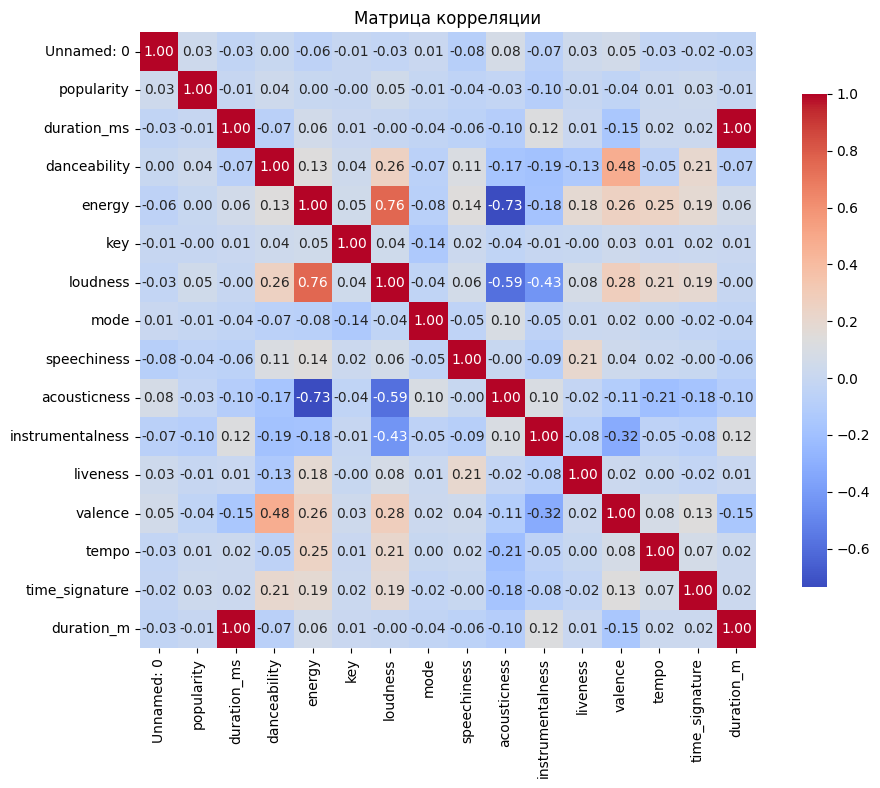

In [72]:
# Выбор числовых признаков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Расчет матрицы корреляций
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции')
plt.show()

## Выводы по матрице корреляции:
* energy и acousticness (-0.73). Cильная отрицательная корреляция.Указывает что по мере увеличения меры акустики энергичность песни будет уменьшаться(и наоборот)
* loudness и energy (0.76). Сильная положительная корреляция. Не удивительно, поскольку громкость и энергия часто связаны между собой в музыке.
* acousticness и loudness (-0.59). Умеренная отрицательная корреляция. Тоже очевидно, тк акустическая музыка часто характеризуется более тихим,cпокойным звуком
* danceability и valence (0.48). Умеренная положительная корреляция. Песни с высокой танцевальностью склонны иметь более положительную эмоциональность
* energy и instrumentalness (-0.73). Сильная отрицательная корреляция. Песни с высокой энергией обычно не используют музыкальные инструменты
* loudness и instrumentalness (-0.43). Умеренная отрицательная корреляция. Песни использующие музыкальные инструменты, склонны быть тихими.
* instrumentalness и valence (-0.32). Слабая отрицательная корреляция. Может быть связано с тем, что инструментальная музыка часто используется для создания более спокойной и расслабляющей атмосферы, которая может быть воспринята в этом датасете как более негативная.
* Также видно что таргет почти ни с чем не коррелирует.

# Feature engineering


In [73]:
# очистка от лишних столбцов созданных во время EDA
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

## **Признак 1:** Зависимость популярности от продолжительности трека


Создам категориальный признак popularity_length, показывающий среднню популярность в каждом интервале длины

Из EDA я выделил несколько диапазонов:
1. 0-2 минуты
2. 2-4 минуты
3. 4-6 минуты
4. 6-12 минут
5. 12+ минут

In [74]:
# Переведу мс в минуты и уберу столбец с мс
df['duration_m'] = df['duration_ms'] / 60000
df = df.drop('duration_ms',axis=1)

# Определение границ интервалов
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 30,40,50,60, df['duration_m'].max()]
# Определение названий интервалов
labels = ['0-1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10-15 мин', '15-20 мин', '20-30 мин', '30-40 мин','40-50 мин','50-60 мин','60+ мин']
# Cоздание нового признака 
df['time_interval'] = pd.cut(df['duration_m'], bins=bins, labels=labels,include_lowest=True)

# **Признак 2:** Признак на основе 'speechiness'

Из EDA я увидел что зависимость популярности от speechiness находится на пике в границах приблизительно от 0 до 0.5

Поэтому решил сделать категориальный признак со следующими промежутками:
1. 0.0 до 0.2 - Low
2. 0.2 до 0.5 - Medium
3. 0.5 до 1.0 - High

In [75]:
# Создание нового признака
df['speechiness_category'] = pd.cut(df['speechiness'],bins=[0.0, 0.2, 0.5, 1.0],labels=['Low', 'Medium', 'High'],include_lowest=True)
df['speechiness_category']

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
113995    Low
113996    Low
113997    Low
113998    Low
113999    Low
Name: speechiness_category, Length: 114000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# **Признак 3:** Признак на основе 'loudness'

Категориальный признак - loudness-category

Разобью их на промежутки:
1. -50 до -30
2. -30 до -10
3. -10 до -5
4. -5 до 5

In [76]:
# Создание нового признака
df['loudness_category'] = pd.cut(df['loudness'], bins=[-50, -30, -10, -5, 5], labels=[1, 2, 3, 4], include_lowest=True)
df['loudness_category']

0         3
1         2
2         3
3         2
4         3
         ..
113995    2
113996    2
113997    2
113998    2
113999    2
Name: loudness_category, Length: 114000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

## Матрица корреляции с новыми признаками

Для матрицы корреляций закодирую столбцы используя LabelEncoder

In [77]:
from sklearn.preprocessing import LabelEncoder
# разделю датасет на нужные столбцы
df1 = df[['popularity', 'loudness_category', 'speechiness_category', 'time_signature']]
label_encoders = {}
for col in df1.select_dtypes(include=['object','bool','category']).columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   popularity            114000 non-null  int64
 1   loudness_category     114000 non-null  int64
 2   speechiness_category  114000 non-null  int64
 3   time_signature        114000 non-null  int64
dtypes: int64(4)
memory usage: 3.5 MB


/tmp/ipykernel_24/2911922140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
/tmp/ipykernel_24/2911922140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])


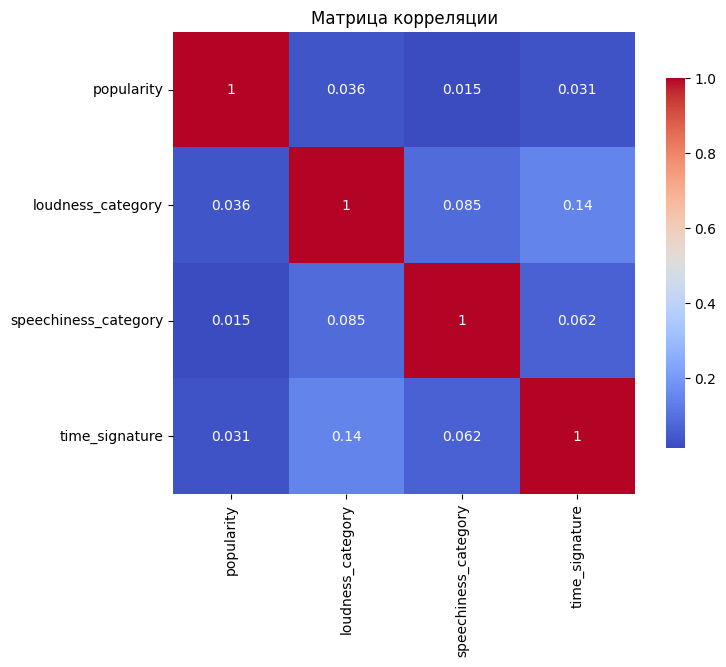

In [78]:
#Вычислю корреляцию с новыми признаками
corr_matrix = df1[['popularity', 'loudness_category', 'speechiness_category', 'time_signature']].corr()

# Выведу новую матрицу в виде heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,cbar_kws={"shrink": .8})
plt.title('Матрица корреляции')
plt.show()

## Новые признаки не коррелируют с таргетом, попробую найти идеи для новых признаков с помощью permutation_importances, после постройки модели

# Подготовка к первой модели

In [79]:
# Узнаю количество null значений
df.isnull().sum()

Unnamed: 0              0
track_id                0
artists                 1
album_name              1
track_name              1
popularity              0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
duration_m              0
time_interval           0
speechiness_category    0
loudness_category       0
dtype: int64

In [80]:
# отброшу null значения
df = df.dropna()

In [81]:
# Удалю ненужный 'Unnamed: 0' и 'track_id'
df = df.drop(['Unnamed: 0','track_id'],axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   artists               113999 non-null  object  
 1   album_name            113999 non-null  object  
 2   track_name            113999 non-null  object  
 3   popularity            113999 non-null  int64   
 4   explicit              113999 non-null  bool    
 5   danceability          113999 non-null  float64 
 6   energy                113999 non-null  float64 
 7   key                   113999 non-null  int64   
 8   loudness              113999 non-null  float64 
 9   mode                  113999 non-null  int64   
 10  speechiness           113999 non-null  float64 
 11  acousticness          113999 non-null  float64 
 12  instrumentalness      113999 non-null  float64 
 13  liveness              113999 non-null  float64 
 14  valence               113999 non-null  fl

In [83]:
label_encoders = {}
for col in df.select_dtypes(include=['object','bool','category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Первая модель

Разобью датасет на:
* X - данные для обучения
* y - таргет

In [84]:
X = df.drop(columns=['popularity']) 
y = df['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Скейл данных

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Для первой модели использую 3-x слойный Sequential с следующими параметрами:

* epochs: 10
* batch_size: 32
* validation_split: 0.2


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 623.4746 - val_loss: 475.6589
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 469.1836 - val_loss: 466.6346
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 458.5645 - val_loss: 458.5234
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 445.3942 - val_loss: 449.4674
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 437.9469 - val_loss: 444.0844
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 437.4176 - val_loss: 439.1240
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 427.5796 - val_loss: 438.2150
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.1226 - val_loss: 432.5285
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 416.0726 - val_loss: 428.0269
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 415.9827 - val_loss: 425.2762
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 426.4789
Test Loss: 420.8304748535156
7

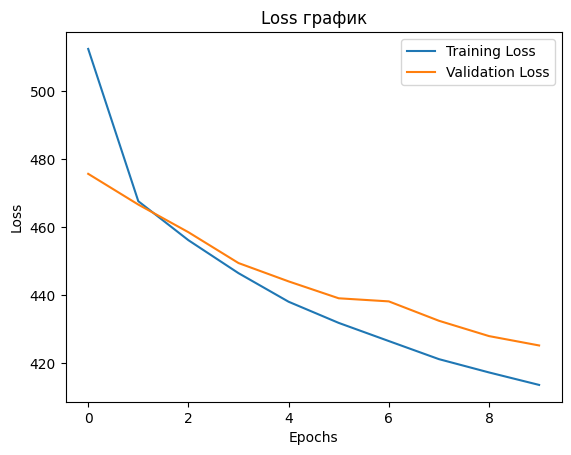

In [86]:
# Модель 
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Предикты на таргете
y_pred = model.predict(X_test)

# Loss график
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss график')
plt.show()

Вычисление метрик
* MAE (Mean Absolute Error): средняя абсолютная ошибка между предсказанными и фактическими значениями
* MSE (Mean Squared Error): средняя квадратичная ошибка между предсказанными и фактическими значениями
* RMSE (Root Mean Squared Error): квадратный корень из средней квадратичной ошибки между предсказанными и фактическими значениями
аты

In [87]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 16.542754620663953
MSE: 420.83037536501206
RMSE: 20.514150612809004


Узнаю влияние каждого признака через permutation_importances

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

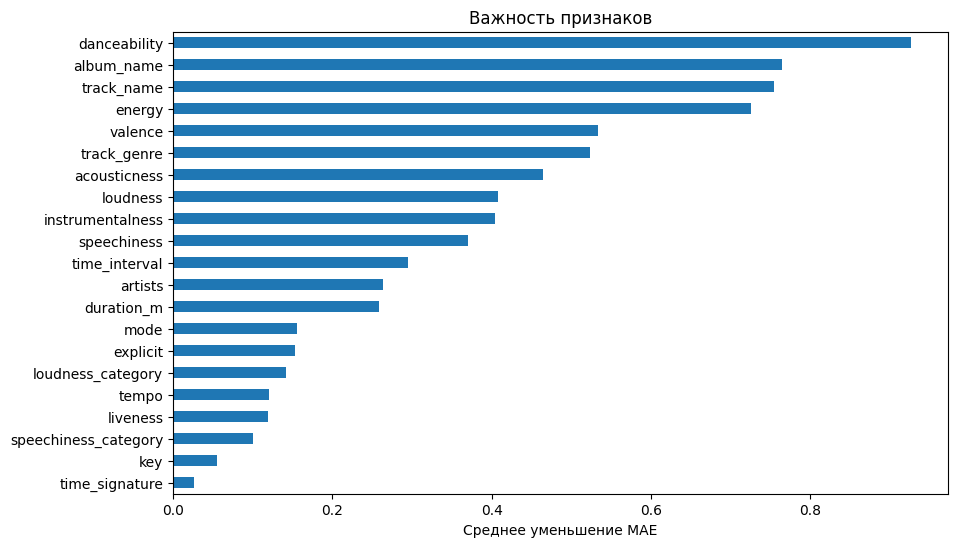

In [88]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## **Вывод** по первой модели:
* MAE: 16.702371411428118
* MSE(loss): 428.621009738563
* RMSE: 20.703164244592

## **Вывод** по созданным признакам:
* Speechiness_category - показал себя относительно хорошо, но возможно стоит удалить оригинальный speechiness.
* time_interval - оказался лучше, чем оригинальый duration_m
* loudness_category  тоже самое что и speechiness_category-

## **Вывод** по оригиналнымм признакам:
* danceability, energy,track_genre - топ 3 признаков
* key, time_signature - самые низкие показател7

# Второй этап Feature engineering

## 1) Попробую все технические числовые параметры(danceability, energy, acousticness и т.д) переделать в категориальные

In [89]:
df1 = df

Создам новые категориальные признаки

In [90]:
df1['danceability_category'] = pd.cut(df['danceability'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df1['energy_category'] = pd.cut(df['energy'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df1['valence_category'] = pd.cut(df['valence'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df1['acousticness_category'] = pd.cut(df['acousticness'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df1['instrumentalness_category'] = pd.cut(df['instrumentalness'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df1['liveness_category'] = pd.cut(df['liveness'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


# Удалю предыдущие числовые признаки
drop = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness','liveness','loudness','duration_m','speechiness']
df1 = df1.drop(drop,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   artists                    113999 non-null  int64   
 1   album_name                 113999 non-null  int64   
 2   track_name                 113999 non-null  int64   
 3   popularity                 113999 non-null  int64   
 4   explicit                   113999 non-null  int64   
 5   key                        113999 non-null  int64   
 6   mode                       113999 non-null  int64   
 7   tempo                      113999 non-null  float64 
 8   time_signature             113999 non-null  int64   
 9   track_genre                113999 non-null  int64   
 10  time_interval              113999 non-null  int64   
 11  speechiness_category       113999 non-null  int64   
 12  loudness_category          113999 non-null  int64   
 13  danceability_catego

Закодирую новые признаки через LabelEncoder

In [91]:
label_encoders = {}
for col in df1.select_dtypes(include=['object','bool','category']).columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

Запущу модель

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 619.7577 - val_loss: 485.3091
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 478.4145 - val_loss: 478.4431
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 466.1920 - val_loss: 468.6086
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 458.9163 - val_loss: 463.0637
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 452.1870 - val_loss: 458.5161
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 445.9300 - val_loss: 453.9351
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 444.9789 - val_loss: 448.2974
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 441.8596 - val_loss: 445.8213
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 435.8846 - val_loss: 443.8545
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 432.2161 - val_loss: 445.1234
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 444.8291
Test Loss: 439.66961669921875
71

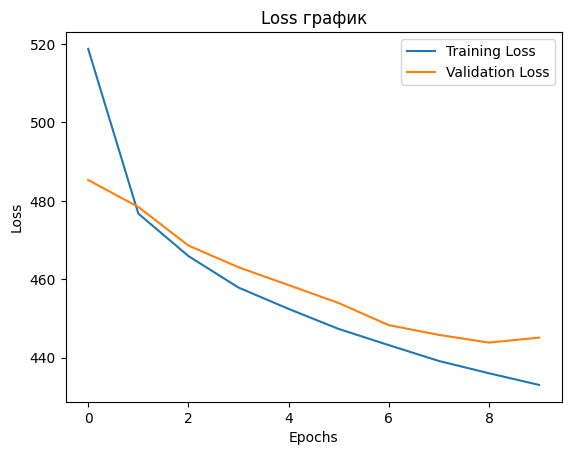

In [92]:
X = df1.drop(columns=['popularity']) 
y = df1['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель 
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Предикты на таргете
y_pred = model.predict(X_test)

# Loss график
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss график')
plt.show()

Вычисление метрик

In [93]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 17.100302014518203
MSE: 439.6693426423759
RMSE: 20.968293746568314


Важность признаков

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

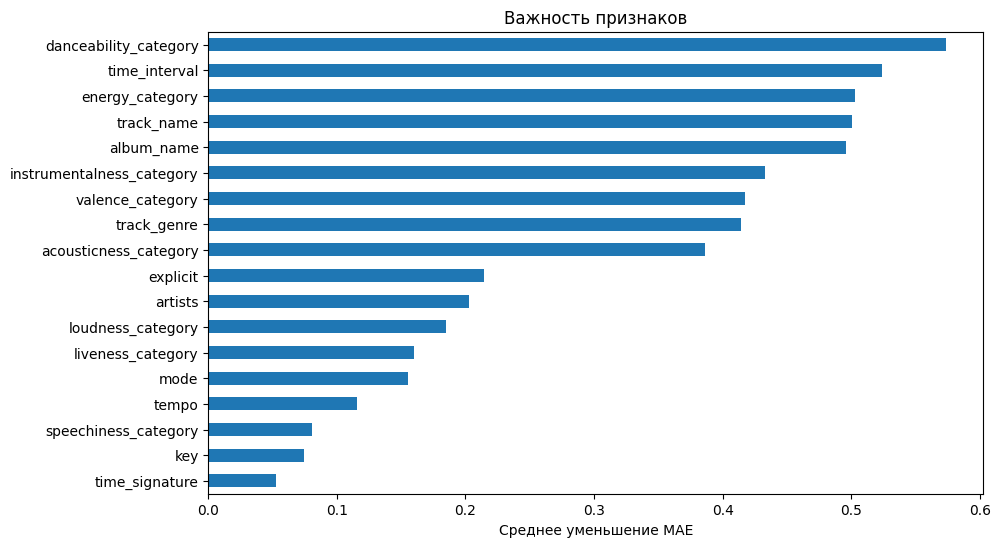

In [94]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Категориальные признаки никак не улучшили loss, отброшу эту идею


## Постараюсь поработать с остальными признаками

## 2) Гипотеза: количество песен у артиста может влиять на популярность

Добавлю новый признак: Количество песен у артиста

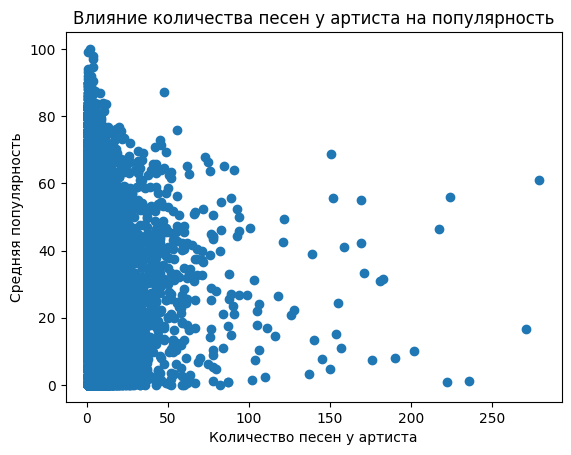

In [95]:
# Подсчет количества песен у артиста:
artist_songs_count = dforig.groupby('artists')['track_id'].count().reset_index()

#Расчет средней популярности у артиста:
artist_popularity = dforig.groupby('artists')['popularity'].mean().reset_index()

plt.scatter(artist_songs_count['track_id'], artist_popularity['popularity'])
plt.xlabel('Количество песен у артиста')
plt.ylabel('Средняя популярность')
plt.title('Влияние количества песен у артиста на популярность')
plt.show()

Из графика видно что самые популярные песни у артистов с общим количеством песен от 1 до 40, соответственно позже добавлю этот признак

## 3) Гипотеза: Если трек является ремиксом, то он может быть менее популярным

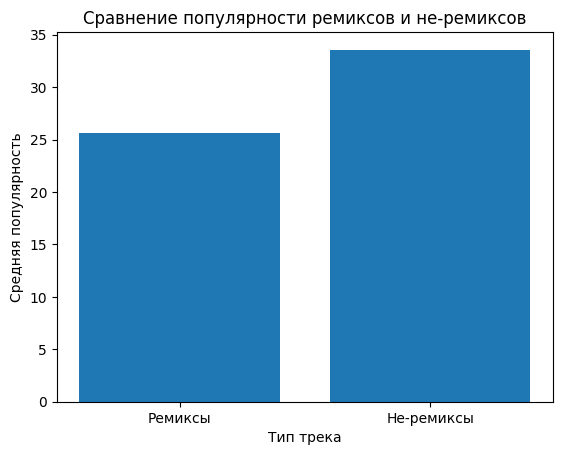

In [96]:
# Определить ремиксы
dforig['is_remix'] = dforig['track_name'].str.contains('remix|mix', case=False)

# Сгруппировать данные по типу трека (ремикс или не-ремикс)
remixes = dforig[dforig['is_remix'] == True]
non_remixes = dforig[dforig['is_remix'] == False]

# Рассчитать среднюю популярность ремиксов и не-ремиксов
remix_popularity = remixes['popularity'].mean()
non_remix_popularity = non_remixes['popularity'].mean()

# Построить график
plt.bar(['Ремиксы', 'Не-ремиксы'], [remix_popularity, non_remix_popularity])
plt.xlabel('Тип трека')
plt.ylabel('Средняя популярность')
plt.title('Сравнение популярности ремиксов и не-ремиксов')
plt.show()

Действительно, видно что ремиксы имеют меньшую популярность чем обычные треки, добавлю данный признак

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   artists                    113999 non-null  int64  
 1   album_name                 113999 non-null  int64  
 2   track_name                 113999 non-null  int64  
 3   popularity                 113999 non-null  int64  
 4   explicit                   113999 non-null  int64  
 5   key                        113999 non-null  int64  
 6   mode                       113999 non-null  int64  
 7   tempo                      113999 non-null  float64
 8   time_signature             113999 non-null  int64  
 9   track_genre                113999 non-null  int64  
 10  time_interval              113999 non-null  int64  
 11  speechiness_category       113999 non-null  int64  
 12  loudness_category          113999 non-null  int64  
 13  danceability_category      113999 

## 4)Гипотеза: Совпадение названия трека с названием альбома может быть признаком того, что трек является популярным

Построю график чтобы узнать это

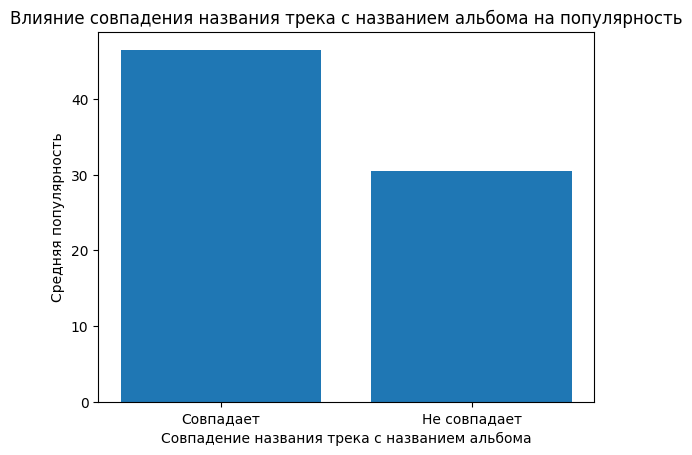

In [98]:
# Новый признак
dforig['track_album_match'] = dforig.apply(lambda row: row['track_name'] == row['album_name'], axis=1)

# Расчет средней популярности для совпадающих и несовпадающих названий
match_popularity = dforig[dforig['track_album_match'] == True]['popularity'].mean()
non_match_popularity = dforig[dforig['track_album_match'] == False]['popularity'].mean()

plt.bar(['Совпадает', 'Не совпадает'], [match_popularity, non_match_popularity])
plt.xlabel('Совпадение названия трека с названием альбома')
plt.ylabel('Средняя популярность')
plt.title('Влияние совпадения названия трека с названием альбома на популярность')
plt.show()

Из графика, видно что действительно треки названия которых совпадают с названием альбома имееют большую популярность. Добавлю этот признак в итоговый датасет

## Построение итогового датасета 


In [99]:
df_main = pd.read_csv('/kaggle/input/spotify/dataset.csv')
df_main

df_main = df_main.dropna()
df_main.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [100]:
# Добавлю все новые признаки
df_main['duration_m'] = df_main['duration_ms'] / 60000
bins = [0, 1, 2, 3, 4, 5, 10, 15, 20, 30,40,50,60, df_main['duration_m'].max()]
labels = ['0-1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10-15 мин', '15-20 мин', '20-30 мин', '30-40 мин','40-50 мин','50-60 мин','60+ мин']
df_main['time_interval'] = pd.cut(df_main['duration_m'], bins=bins, labels=labels)
df_main['loudness_category'] = pd.cut(df_main['loudness'], bins=[-50, -30, -10, -5, 5], labels=[1, 2, 3, 4], include_lowest=True)
df_main['artist_song_count'] = df_main['artists'].map(df_main['artists'].value_counts())
df_main['is_remix'] = df_main['track_name'].str.contains('remix|mix', case=False)
df_main['track_album_match'] = df_main.apply(lambda row: row['track_name'] == row['album_name'], axis=1)
df_main

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,valence,tempo,time_signature,track_genre,duration_m,time_interval,loudness_category,artist_song_count,is_remix,track_album_match
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.7150,87.917,4,acoustic,3.844433,3-4 мин,3,10,False,True
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.2670,77.489,4,acoustic,2.493500,2-3 мин,2,13,False,False
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.1200,76.332,4,acoustic,3.513767,3-4 мин,3,1,False,True
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.1430,181.740,3,acoustic,3.365550,3-4 мин,2,15,False,False
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.1670,119.949,4,acoustic,3.314217,3-4 мин,3,11,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0339,125.995,5,world-music,6.416650,5-10 мин,2,4,False,False
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.0350,85.239,4,world-music,6.416667,5-10 мин,2,4,False,False
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.7430,132.378,4,world-music,4.524433,4-5 мин,2,14,False,False
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.4130,135.960,4,world-music,4.731550,4-5 мин,2,30,False,False


In [101]:
# Отброшу ненужные колонки
drop = ['loudness','Unnamed: 0','track_id','duration_ms']
df_main = df_main.drop(drop, axis=1)

In [102]:
# Закодирую все признаки
label_encoders = {}
for col in df_main.select_dtypes(include=['object','bool','category']).columns:
    le = LabelEncoder()
    df_main[col] = le.fit_transform(df_main[col])
    label_encoders[col] = le

df_main

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,...,valence,tempo,time_signature,track_genre,duration_m,time_interval,loudness_category,artist_song_count,is_remix,track_album_match
0,10357,8100,11741,73,0,0.676,0.4610,1,0,0.1430,...,0.7150,87.917,4,0,3.844433,6,2,10,0,1
1,3287,14796,22528,55,0,0.420,0.1660,1,1,0.0763,...,0.2670,77.489,4,0,2.493500,4,1,13,0,0
2,12397,39162,60774,57,0,0.438,0.3590,0,1,0.0557,...,0.1200,76.332,4,0,3.513767,6,2,1,0,1
3,14839,8580,9580,71,0,0.266,0.0596,0,1,0.0363,...,0.1430,181.740,3,0,3.365550,6,1,15,0,0
4,5255,16899,25689,82,0,0.618,0.4430,2,1,0.0526,...,0.1670,119.949,4,0,3.314217,6,2,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,0,0.172,0.2350,5,1,0.0422,...,0.0339,125.995,5,113,6.416650,10,1,4,0,0
113996,22486,66,65090,22,0,0.174,0.1170,0,0,0.0401,...,0.0350,85.239,4,113,6.416667,10,1,4,0,0
113997,4952,5028,38207,22,0,0.629,0.3290,0,0,0.0420,...,0.7430,132.378,4,113,4.524433,8,1,14,0,0
113998,18534,7238,21507,41,0,0.587,0.5060,7,1,0.0297,...,0.4130,135.960,4,113,4.731550,8,1,30,0,0


In [103]:
# Посмотрю корреляцию с новыми признаками
df_main.corr()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,...,valence,tempo,time_signature,track_genre,duration_m,time_interval,loudness_category,artist_song_count,is_remix,track_album_match
artists,1.000000,0.090176,0.038936,0.003636,-0.004677,-0.009925,-0.005582,0.006619,-0.002974,-0.016229,...,0.001019,0.001168,-0.008208,-0.008688,-0.021576,-0.038826,-0.023356,0.005491,0.000042,0.010219
album_name,0.090176,1.000000,0.303307,0.042501,0.000371,-0.019166,-0.044731,-0.006886,-0.000449,-0.013397,...,-0.041702,-0.003290,-0.001226,0.003505,0.006693,0.014122,-0.025255,-0.003750,-0.007407,0.034412
track_name,0.038936,0.303307,1.000000,0.011935,-0.005846,-0.020867,-0.039642,-0.003909,0.006095,-0.025665,...,-0.016551,0.005582,-0.002536,0.001860,0.004156,0.012395,-0.014300,0.024438,-0.026014,0.002945
popularity,0.003636,0.042501,0.011935,1.000000,0.044078,0.035444,0.001053,-0.003847,-0.013948,-0.044930,...,-0.040522,0.013212,0.031076,0.032696,-0.007129,0.031495,0.035789,-0.095378,-0.071304,0.274692
explicit,-0.004677,0.000371,-0.005846,0.044078,1.000000,0.122506,0.096954,0.004485,-0.037216,0.307951,...,-0.003378,-0.002815,0.038387,-0.054827,-0.065270,-0.078010,0.102812,-0.055221,-0.006451,0.076118
danceability,-0.009925,-0.019166,-0.020867,0.035444,0.122506,1.000000,0.134325,0.036470,-0.069224,0.108625,...,0.477347,-0.050448,0.207219,0.003570,-0.073435,-0.047865,0.135536,-0.032188,0.113459,0.117016
energy,-0.005582,-0.044731,-0.039642,0.001053,0.096954,0.134325,1.000000,0.048007,-0.078365,0.142508,...,0.258937,0.247852,0.187127,-0.056175,0.058520,0.126099,0.705669,-0.036175,0.109303,0.004624
key,0.006619,-0.006886,-0.003909,-0.003847,0.004485,0.036470,0.048007,1.000000,-0.135911,0.020419,...,0.034099,0.010914,0.015064,-0.005509,0.008123,0.017282,0.028368,-0.003432,0.021164,0.006822
mode,-0.002974,-0.000449,0.006095,-0.013948,-0.037216,-0.069224,-0.078365,-0.135911,1.000000,-0.046535,...,0.021964,0.000572,-0.024090,0.005245,-0.035581,-0.045855,-0.043387,0.076222,-0.055030,-0.042114
speechiness,-0.016229,-0.013397,-0.025665,-0.044930,0.307951,0.108625,0.142508,0.020419,-0.046535,1.000000,...,0.036637,0.017274,-0.000011,-0.085145,-0.062605,-0.106596,0.057197,-0.061033,0.002436,0.037015


Видно корреляцию таргета с одним из новых признаков 'track_album_match'

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 573.6771 - val_loss: 434.5156
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 429.5952 - val_loss: 424.1657
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 416.2035 - val_loss: 417.3232
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 405.0275 - val_loss: 412.9925
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 404.0104 - val_loss: 406.9193
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 394.1283 - val_loss: 404.0994
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 392.3536 - val_loss: 399.6106
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 386.6093 - val_loss: 397.5354
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 384.4380 - val_loss: 400.8654
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 380.8365 - val_loss: 395.1273
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 398.0533
Test Loss: 389.83978271484375
71

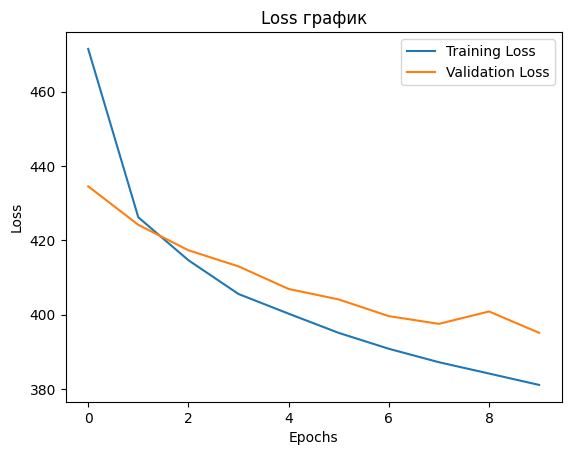

In [104]:
X = df_main.drop(columns=['popularity']) 
y = df_main['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель 
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Предикты на таргете
y_pred = model.predict(X_test)

# Loss график
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss график')
plt.show()

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

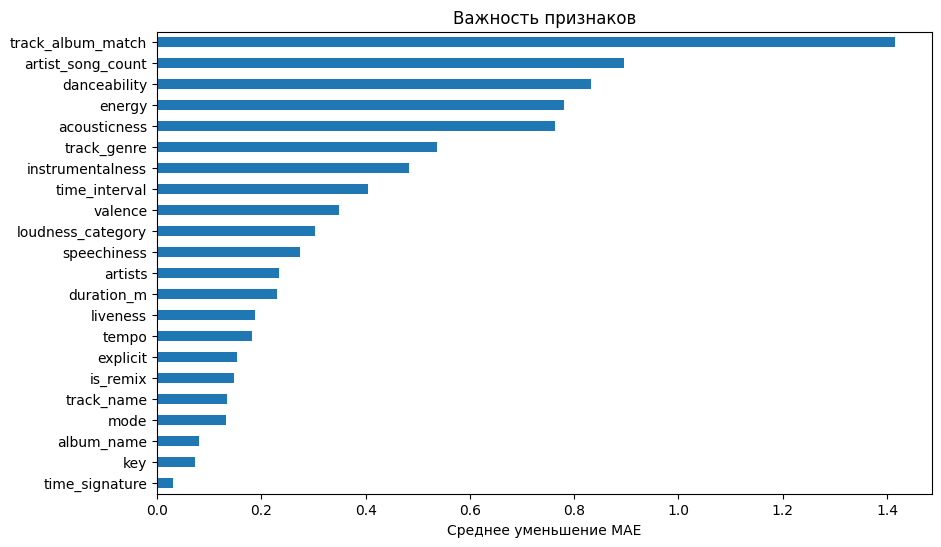

In [105]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Высокую важность занимают новые добавленные признаки: 'track_album_match' и 'artist_song_count' 

# Вывод из feature engineering:
В ходе работы были добавлены новые признаки:
* time_interval - временной интервал
* artist_songs_count- количество песен артиста
* is_remix - является ли трек ремиксом
* track_album_match - совпадение названия трека с названием альбома


# Построение итоговой модели

Сначала построю несколько разных типов моделей и выберу их них с наилучшим результатом

## 1) Нейронная сеть

В новую нейронную сеть я добавил:
* Увеличение количества эпох до 100
* EarlyStopping для предотвращения переобучения
* Увеличил число нейронов в слоях
* Добавил слои Dropout

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 559.5682 - val_loss: 436.0133
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 444.0055 - val_loss: 429.3595
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 437.0504 - val_loss: 425.4582
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 435.0816 - val_loss: 420.7633
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 428.9053 - val_loss: 414.7607
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.4650 - val_loss: 417.8922
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 418.1077 - val_loss: 408.5885
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 415.4369 - val_loss: 406.2332
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 414.8361 - val_loss: 404.9200
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 412.3657 - val_loss: 401.7488
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 411.8555 - val_lo

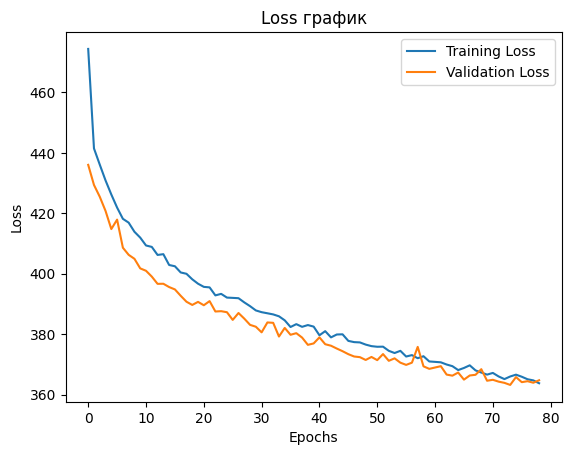

In [106]:
X = df_main.drop(columns=['popularity'])
y = df_main['popularity'] 
from tensorflow.keras import layers

# Разделение на тренеровочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Увеличено количество нейронов
    layers.Dropout(0.2),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  
    layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')  # Изменена скорость обучения

# Добавление EarlyStopping для предотвращения переобучения
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])  # Увеличено количество эпох

# Оценка модели
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# График Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss график')
plt.show()

In [107]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

neuron_result = mse
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 14.972095732521593
MSE: 358.1118253788124
RMSE: 18.923842775155695


## 2)LinearRegression

Создам модель линейной регрессии
Также добавлю в модель:
* Регуляризацию  'Lasso' и 'Ridge'
* Выбор наиболее важных прмзнаков через SelectKBest

In [108]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

X = df_main.drop(columns=['popularity'])  
y = df_main['popularity'] 

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Выбор признаков
selector = SelectKBest(f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Регуляризация
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Обучение моделей
lasso_model.fit(X_train_selected, y_train)
ridge_model.fit(X_train_selected, y_train)

# Предсказание на тестовой выборке
y_pred_lasso = lasso_model.predict(X_test_selected)
y_pred_ridge = ridge_model.predict(X_test_selected)

# Оценка моделей
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Вычисление метрик
print(f'MSE Lasso: {mse_lasso}')
print(f'R2 Lasso: {r2_lasso}')
print(f'MSE Ridge: {mse_ridge}')
print(f'R2 Ridge: {r2_ridge}')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
linear_result = mse
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE Lasso: 449.3673962563318
R2 Lasso: 0.09418074708710789
MSE Ridge: 449.32250025196464
R2 Ridge: 0.09427124689967425
MAE: 14.972095732521593
RMSE: 18.923842775155695


## 3) Градиентный бустинг(XGBRegressor)

In [109]:
import xgboost as xgb

X = df_main.drop(columns=['popularity'])
y = df_main['popularity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели градиентного бустинга
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Задача регрессии
    n_estimators=100,  # Количество деревьев
    learning_rate=0.1,  # Скорость обучения
    max_depth=6,  # Глубина деревьев
    alpha=10,  # L1 регуляризация
    reg_lambda=10  # L2 регуляризация
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
gradient_result = mse
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 12.842605576722049
MSE: 277.97091117366864
RMSE: 16.67245966177962


## 4)Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Создание модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
rf_y_pred = rf_model.predict(X_test)

# Оценка модели
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_result = rf_mse
print(f'Random Forest Test Mean Squared Error: {rf_mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

Random Forest Test Mean Squared Error: 416.26573159080976
MAE: 12.842605576722049
RMSE: 16.67245966177962


## Лучше всего показала себя модель градиентного бустинга

Добавлю кроссвалидацию с 10 фолдами и дополнительные параметры

In [111]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_main.drop(columns=['popularity'])
y = df_main['popularity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Задача регрессии
    n_estimators=200,  # Количество деревьев
    learning_rate=0.05,  # Скорость обучения
    max_depth=8,  # Глубина деревьев
    alpha=5,  # L1 регуляризация
    reg_lambda=5,  # L2 регуляризация
    gamma=0.1,  # Регуляризация дерева
    subsample=0.8,  # Подвыборка строк
    colsample_bytree=0.8,  # Подвыборка столбцов
    colsample_bylevel=0.8,  # Подвыборка столбцов на уровне дерева
    min_child_weight=1,  
    silent=True,  # Без вывода информации
    n_jobs=-1  # Количество процессоров
)

# Кроссвалидация
k = 10  # Количество фолдов
fold_size = len(X_train) // k

# Хранение результатов
mse_list = []
mae_list = []
r2_list = []

# Кросс-валидация
for i in range(k):
    # Индексы разделения на обучающую и тестовую выборки
    test_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = list(set(range(len(X_train))) - set(test_indices))
    
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_test_fold = X_train[test_indices]
    y_test_fold = y_train.iloc[test_indices]
    
    # Обучение модели
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)

    # Вычисление метрик
    mse = mean_squared_error(y_test_fold, y_pred)
    mae = mean_absolute_error(y_test_fold, y_pred)
    r2 = r2_score(y_test_fold, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Вывод результатов
print(f'MSE: {mse_list}')
print(f'MAE: {mae_list}')
print(f'R2: {r2_list}')


print(f'Среднее значение MSE: {np.mean(mse_list)}')
print(f'Среднее значение MAE: {np.mean(mae_list)}')
print(f'Среднее значение R2: {np.mean(r2_list)}')

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

MSE: [231.5418255502085, 236.8200961782431, 244.58804958628917, 242.5255629416156, 237.63931627515902, 226.82884668291587, 235.83904806131602, 236.97585295807028, 242.7490328546366, 238.11023825382952]
MAE: [11.452901045412801, 11.491036543877325, 11.781728088767911, 11.769715710037042, 11.532272036997547, 11.302609417055626, 11.537414351752949, 11.59187551487692, 11.717355725429899, 11.544097822755559]
R2: [0.534988273654923, 0.5206359357414857, 0.5144552068377803, 0.5158766217802966, 0.5210150170519479, 0.5373842822878647, 0.5251668098310924, 0.5236678065022873, 0.5189651779404003, 0.5197633294797057]
Среднее значение MSE: 237.3617869342284
Среднее значение MAE: 11.572100625696358
Среднее значение R2: 0.5231918461107784


# Итоговый вывод по работе


## За работу мне удалось уменьшить loss с 424 до 226


## Лучшая модель и ее показатели
* Модель: XGBRegressor
* MAE: 11.572100625696358
* MSE: 237.3617869342284
* R2: 0.5231918461107784

## Работая над Feature Engineering я добавил следующие признаки в датасете
* time_interval - временной интервал
* artist_songs_count- количество песен артиста
* is_remix - является ли трек ремиксом
* track_album_match - совпадение названия трека с названием альбома
* loudness_category - разбиение loudness на интервалы

## Также в ходе EDA я обнаружил максимально низкую корреляцию столбцов датасета с таргетом, что может говорить о том что популярность песни зависит от сторонних показателей не предоставленных в датасете.


# Эксперименты

Посмотрю сколько песен имеет нулевую популярность

In [112]:
print(df_main['popularity'].value_counts()[0])

16019


Из 113000 песен 16019 имеет 0 популярность. Попробую выбросить песни где популярность равна 0

In [113]:
df_main = df_main.drop(df_main[df_main['popularity'] == 0].index)
print(len(df_main))
df_main

97980


,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,...,valence,tempo,time_signature,track_genre,duration_m,time_interval,loudness_category,artist_song_count,is_remix,track_album_match
0,10357,8100,11741,73,0,0.676,0.4610,1,0,0.1430,...,0.7150,87.917,4,0,3.844433,6,2,10,0,1
1,3287,14796,22528,55,0,0.420,0.1660,1,1,0.0763,...,0.2670,77.489,4,0,2.493500,4,1,13,0,0
2,12397,39162,60774,57,0,0.438,0.3590,0,1,0.0557,...,0.1200,76.332,4,0,3.513767,6,2,1,0,1
3,14839,8580,9580,71,0,0.266,0.0596,0,1,0.0363,...,0.1430,181.740,3,0,3.365550,6,1,15,0,0
4,5255,16899,25689,82,0,0.618,0.4430,2,1,0.0526,...,0.1670,119.949,4,0,3.314217,6,2,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,0,0.172,0.2350,5,1,0.0422,...,0.0339,125.995,5,113,6.416650,10,1,4,0,0
113996,22486,66,65090,22,0,0.174,0.1170,0,0,0.0401,...,0.0350,85.239,4,113,6.416667,10,1,4,0,0
113997,4952,5028,38207,22,0,0.629,0.3290,0,0,0.0420,...,0.7430,132.378,4,113,4.524433,8,1,14,0,0
113998,18534,7238,21507,41,0,0.587,0.5060,7,1,0.0297,...,0.4130,135.960,4,113,4.731550,8,1,30,0,0


In [114]:
X = df_main.drop(columns=['popularity'])
y = df_main['popularity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Задача регрессии
    n_estimators=200,  # Количество деревьев
    learning_rate=0.05,  # Скорость обучения
    max_depth=8,  # Глубина деревьев
    alpha=5,  # L1 регуляризация
    reg_lambda=5,  # L2 регуляризация
    gamma=0.1,  # Регуляризация дерева
    subsample=0.8,  # Подвыборка строк
    colsample_bytree=0.8,  # Подвыборка столбцов
    colsample_bylevel=0.8,  # Подвыборка столбцов на уровне дерева
    min_child_weight=1,  
    silent=True,  # Без вывода информации
    n_jobs=-1  # Количество процессоров
)

# Кроссвалидация
k = 10  # Количество фолдов
fold_size = len(X_train) // k

# Хранение результатов
mse_list = []
mae_list = []
r2_list = []

# Кросс-валидация
for i in range(k):
    # Индексы разделения на обучающую и тестовую выборки
    test_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = list(set(range(len(X_train))) - set(test_indices))
    
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_test_fold = X_train[test_indices]
    y_test_fold = y_train.iloc[test_indices]
    
    # Обучение модели
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)

    # Вычисление метрик
    mse = mean_squared_error(y_test_fold, y_pred)
    mae = mean_absolute_error(y_test_fold, y_pred)
    r2 = r2_score(y_test_fold, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Вывод результатов
print(f'MSE: {mse_list}')
print(f'MAE: {mae_list}')
print(f'R2: {r2_list}')


print(f'Среднее значение MSE: {np.mean(mse_list)}')
print(f'Среднее значение MAE: {np.mean(mae_list)}')
print(f'Среднее значение R2: {np.mean(r2_list)}')

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:10:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

MSE: [176.88121083711147, 171.76420748650864, 178.75062401428934, 175.6226227896518, 174.32782683635517, 172.52542793178148, 184.98720887197476, 171.26655176000523, 172.67767651247712, 181.46477505550828]
MAE: [9.881951975571308, 9.745987640941408, 9.899412741914531, 9.870433181752414, 9.752534607252803, 9.743680964770382, 10.08328770002211, 9.734121500251852, 9.788360497512876, 9.978027158974081]
R2: [0.522287364797519, 0.5325387354858715, 0.5076046306510704, 0.5162477220711037, 0.521990030011174, 0.5226768617427611, 0.5094295330754111, 0.5325801520666114, 0.5353229088994058, 0.5095671563104199]
Среднее значение MSE: 176.0268132095663
Среднее значение MAE: 9.847779796896377
Среднее значение R2: 0.5210245095111348


Удаление нулевых значений popularity позволило достичь еще большего уменьшения Loss 